<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#简单概念回顾" data-toc-modified-id="简单概念回顾-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>简单概念回顾</a></span></li><li><span><a href="#Sklearn的设计概述" data-toc-modified-id="Sklearn的设计概述-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sklearn的设计概述</a></span></li><li><span><a href="#机器学习流程" data-toc-modified-id="机器学习流程-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>机器学习流程</a></span></li><li><span><a href="#简单的sklearn-API套路" data-toc-modified-id="简单的sklearn-API套路-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>简单的sklearn API套路</a></span></li><li><span><a href="#Preparing-data" data-toc-modified-id="Preparing-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preparing data</a></span></li><li><span><a href="#数据处理（上）" data-toc-modified-id="数据处理（上）-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>数据处理（上）</a></span><ul class="toc-item"><li><span><a href="#Standardization,-or-mean-removal-and-variance-scaling" data-toc-modified-id="Standardization,-or-mean-removal-and-variance-scaling-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Standardization, or mean removal and variance scaling</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Binarization（离散化）" data-toc-modified-id="Binarization（离散化）-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Binarization（离散化）</a></span></li><li><span><a href="#Encoding-categorical-features" data-toc-modified-id="Encoding-categorical-features-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Encoding categorical features</a></span></li></ul></li></ul></div>

**监督学习与无监督学习**  
> * 最大的区别就是有没有标签  
> * 工业应用中主要是用监督学习

**分类任务和回归任务**  
> * 能用线性模型，决不用非线性模型（容易over fitting，且计算量太大）  

**模型的评估**  
> * accuracy：很少用，样本不均衡时，易出问题  
> * recall与precision：二者之间的trade off  
> * F1-score：综合均衡考量recall与precision  
> * AUC：ROC曲线下方面积

**特征处理（特征工程）**  
> * 决定机器学习建模效果的核心  
> * 业务经验相关  
> * 熟悉相关工具

快速入门参考学习文档：  
  
>  https://sklearn.apachecn.org/docs/0.21.3/      
>  https://sklearn.apachecn.org/docs/0.21.3/50.html

* **获取数据**
> 爬虫  
> 数据库  
> 数据文件(csv、excel、txt)  
* **数据处理**
> 文本处理  
> 量纲一致  
> 降维  
* **建立模型**
> 分类  
> 回归  
> 聚类  
* **评估模型**
> 超参数择优  
> 哪个模型更好

## 简单的sklearn API套路

* fit：训练模型  
* transform：将数据转换为模型处理后的结果（label会放在test集后面）  
* predict：返回模型预测结果  
* predict_proba：预测概率值  
* score：模型准确率（很少用默认的accuracy，会设置为f1）  
* get_params：获取参数  

## Preparing data

**数据集划分：**  
> * Training data（70%）  
> * Validation data
> * Testing data（30%）  

实际工作中，大部分的情况下**不会完全随机划分，会用已经发生（时间在前的、过去的）数据作为训练集，来预测未来（时间在后的）数据**。否则使用未来数据预测过去的数据，会引入一些未来发生的先验信息，是不合理的，容易造成过拟合。  
  
另外也会有其他情况，例如按地域划分。

## 数据处理（上）

数据集：[ML DATASETS](http://archive.ics.uci.edu/ml/)

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df  = pd.read_csv("forestfires.csv")
df.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [3]:
df1 = df.loc[:,"FFMC":"rain"]
df1.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0

In [4]:
from sklearn.model_selection import train_test_split

# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(df1.astype(float), df['area'], test_size=0.3)

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train.astype(float))

X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [6]:
X_test_ss

array([[ 0.10438385, -0.23502021, -1.25575305, ..., -0.37922263,
         0.22713984, -0.07894866],
       [-0.07211531,  2.86479811,  1.2413217 , ...,  0.87904363,
        -0.27488557, -0.07894866],
       [-0.60161279, -0.38217851,  0.71962861, ..., -0.63087588,
        -1.05581398, -0.07894866],
       ...,
       [ 0.3250078 ,  0.69065295,  0.45156972, ..., -0.75670251,
        -0.55378857, -0.07894866],
       [ 0.63388133,  0.63843549,  0.73365262, ..., -1.07126907,
        -0.55378857, -0.07894866],
       [ 0.92069247, -0.0103269 ,  0.40709358, ...,  0.62739038,
         0.72916525, -0.07894866]])

In [7]:
print(X_test.shape, X_test_ss.shape)

(156, 8) (156, 8)


In [8]:
X_test_ss.mean(axis=0)

array([ 0.01302291,  0.10067071,  0.03239059,  0.26269428,  0.05869303,
        0.05431462, -0.13900974, -0.05702522])

In [9]:
X_test_ss.std(axis=0)

array([1.60989493, 1.03730731, 0.97624926, 1.41389812, 1.07894201,
       1.08154737, 0.98797417, 0.19237736])

In [10]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
mms.transform(X_train)

array([[0.93691589, 0.50848044, 0.84519761, ..., 0.30379747, 0.31764706,
        0.        ],
       [0.89252336, 0.85150571, 0.87475079, ..., 0.51898734, 0.25882353,
        0.        ],
       [0.90654206, 0.30875736, 0.58132989, ..., 0.69620253, 0.15294118,
        0.        ],
       ...,
       [0.8411215 , 0.91311873, 0.93280169, ..., 0.49367089, 0.25882353,
        0.        ],
       [0.9135514 , 0.41086881, 0.78163481, ..., 0.17721519, 0.42352941,
        0.        ],
       [0.86214953, 0.27102804, 0.847074  , ..., 0.60759494, 0.47058824,
        0.        ]])

###  Normalization

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

Normalizer类也拥有fit、transform等转换器API拥有的常见方法，但实际上fit和transform对其是没有实际意义的，因为归一化操作是对每个样本单独进行变换，不存在针对所有样本上的统计学习过程。这里的设计，仅仅是为了供sklearn中的pipeline等API调用时，传入该对象时，各API的方法能够保持一致性，方便使用pipeline。

In [12]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

In [13]:
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_train_norm

array([[0.12449966, 0.19879999, 0.97016527, ..., 0.05193034, 0.00479357,
        0.        ],
       [0.11434154, 0.31007029, 0.940946  , ..., 0.06990313, 0.00386964,
        0.        ],
       [0.17552201, 0.17437978, 0.95870806, ..., 0.13325966, 0.00418816,
        0.        ],
       ...,
       [0.10482123, 0.3121187 , 0.94186683, ..., 0.06331484, 0.00363474,
        0.        ],
       [0.13357448, 0.17487427, 0.97386628, ..., 0.04187741, 0.00649822,
        0.        ],
       [0.1215168 , 0.10859807, 0.9826309 , ..., 0.08477917, 0.00659394,
        0.        ]])

In [15]:
sum(np.square(X_train_norm[1]))

1.0

### Binarization（离散化）

Feature binarization is the process of thresholding numerical features to get boolean values. This can be useful for downstream probabilistic estimators that make assumption that the input data is distributed according to a multi-variate Bernoulli distribution. For instance, this is the case for the sklearn.neural_network.BernoulliRBM.

In [16]:
df['DC'].mean()

547.9400386847191

In [17]:
from sklearn.preprocessing import Binarizer

bi = Binarizer(548)
DC_bi = bi.fit_transform(df[['DC']])
DC_bi

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],

In [18]:
df['DC_bi'] = DC_bi[:, 0]

In [20]:
df.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  DC_bi
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0    0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0    1.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0    1.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0    0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0    0.0

Return indices of half-open bins to which each value of x belongs.
```python
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)
```  
pandas.cut是按分位数划分的

In [22]:
pd.cut(df['DC'], 5)

0       (7.047, 178.44]
1      (519.52, 690.06]
2      (519.52, 690.06]
3       (7.047, 178.44]
4       (7.047, 178.44]
             ...       
512    (519.52, 690.06]
513    (519.52, 690.06]
514    (519.52, 690.06]
515    (519.52, 690.06]
516     (7.047, 178.44]
Name: DC, Length: 517, dtype: category
Categories (5, interval[float64]): [(7.047, 178.44] < (178.44, 348.98] < (348.98, 519.52] < (519.52, 690.06] < (690.06, 860.6]]

### Encoding categorical features

We could encode categorical features as integers, but such integer representation can not be used directly with scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired.

One possibility to convert categorical features to features that can be used with scikit-learn estimators is to use a one-of-K or one-hot encoding, which is implemented in [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). This estimator transforms each categorical feature with m possible values into m binary features, with only one active.

**OneHotEncoder**(一般不用)
```python
class sklearn.preprocessing.OneHotEncoder(n_values='auto', categorical_features='all', dtype=<type 'numpy.float64'>, 
                                          sparse=True, handle_unknown='error')```

Convert categorical variable into dummy/indicator variables
```python
pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
```

In [23]:
modelData = pd.get_dummies(data=df, columns=['month','day'])
modelData.head()

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...          0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...          0   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...          0   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...          0   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...          0   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0          0          0        1        0        0        0        0        0   
1          1          0        0        0        0        0        0        1   
2          1          0        0        0        1        0        0        0   
3          0          0        1        0        0        0        0        0   
4          0          0        0        0        0        1        0        0   

   day_wed  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 31 columns]

###  Imputation of missing values

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). **_A better strategy is to impute the missing values, i.e., to infer them from the known part of the data._**


The [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) class provides basic strategies for imputing missing values, either using the mean, the median or the most frequent value of the row or column in which the missing values are located. This class also allows for different missing values encodings.



**The imputation strategy:**
1. If “mean”, then replace missing values using the mean along the axis.
2. If “median”, then replace missing values using the median along the axis.
3. If “most_frequent”, then replace missing using the most frequent value along the axis.
4. If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

```python
class sklearn.impute.SimpleImputer(missing_values=nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)
```

In [24]:
df.loc[:, 'DC_na'] = np.nan
df.loc[df['DC']>=600, 'DC_na'] = df['DC']

In [25]:
from sklearn.impute import SimpleImputer

im = SimpleImputer()

In [26]:
df.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  DC_bi  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0    0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0    1.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0    1.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0    0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0    0.0   

   DC_na  
0    NaN  
1  669.1  
2  686.9  
3    NaN  
4    NaN

In [27]:
im.fit_transform(df[['DC_na']])

array([[703.07754491],
       [669.1       ],
       [686.9       ],
       [703.07754491],
       [703.07754491],
       [703.07754491],
       [703.07754491],
       [608.2       ],
       [692.6       ],
       [698.6       ],
       [698.6       ],
       [713.        ],
       [665.3       ],
       [686.5       ],
       [699.6       ],
       [713.9       ],
       [703.07754491],
       [664.2       ],
       [703.07754491],
       [703.07754491],
       [692.6       ],
       [724.3       ],
       [703.07754491],
       [703.07754491],
       [703.07754491],
       [601.4       ],
       [668.        ],
       [686.5       ],
       [721.4       ],
       [728.6       ],
       [692.3       ],
       [709.9       ],
       [706.8       ],
       [718.3       ],
       [724.3       ],
       [730.2       ],
       [669.1       ],
       [682.6       ],
       [686.9       ],
       [703.07754491],
       [703.07754491],
       [624.2       ],
       [647.1       ],
       [698

**【一些实践中的 tips】**  
1. 尽量不要把包含个别特征缺失值的样本删除，实践中最好使用一些业务经验来做一些合理的推测值的填充，利用好样本
2. 如果没有合适的推测手段来填充，可以填充一些像-999,-1这样的没有意义的值
3. 其他一些可能用到的方法:
    * np.nan
    * np.inf
    * df.fillna
    * df.replace

## 特征选择

### SelectFromModel

```python
class sklearn.feature_selection.SelectFromModel(estimator, threshold=None, prefit=False, norm_order=1, max_features=None)
```

- L1-based feature selection（实际应用中少于树模型，这里演示用L1正则的模型来选取特征）
- Tree-based feature selection（实际应用中优先考虑，这里演示RF）

In [29]:
from sklearn.feature_selection import SelectFromModel

In [30]:
# 查看帮助文档
help(SelectFromModel)

Help on class SelectFromModel in module sklearn.feature_selection.from_model:

class SelectFromModel(sklearn.base.BaseEstimator, sklearn.feature_selection.base.SelectorMixin, sklearn.base.MetaEstimatorMixin)
 |  SelectFromModel(estimator, threshold=None, prefit=False, norm_order=1, max_features=None)
 |  
 |  Meta-transformer for selecting features based on importance weights.
 |  
 |  .. versionadded:: 0.17
 |  
 |  Parameters
 |  ----------
 |  estimator : object
 |      The base estimator from which the transformer is built.
 |      This can be both a fitted (if ``prefit`` is set to True)
 |      or a non-fitted estimator. The estimator must have either a
 |      ``feature_importances_`` or ``coef_`` attribute after fitting.
 |  
 |  threshold : string, float, optional default None
 |      The threshold value to use for feature selection. Features whose
 |      importance is greater or equal are kept while the others are
 |      discarded. If "median" (resp. "mean"), then the ``thre

> - estimator：对象。构建特征选择实例的基本分类器。如果参数prefit为True，则该参数可以由一个已经训练过的分类器初始化。如果prefit为False，则该参数只能传入没有经过训练的分类器实例  
  
  
> - threshold：字符串，浮点数，（可选的）默认为None。该参数指定特征选择的阈值，词语在分类模型中对应的系数值大于该值时被保留，否则被移除。如果该参数为字符串类型，则可设置的值有”mean”表示系数向量值的均值，”median”表示系数向量值的中值，也可以为”0.x*mean”或”0.x*median”。当该参数设置值为None时，如果分类器具有罚项且罚项设置为l1，则阈值为1e-5，否则该值为”mean”  
  
  
> - prefit：布尔类型。默认值为False。是否对传入的基本分类器事先进行训练。如果设置该值为True，则需要对传入的基本分类器进行训练，如果设置该值为False，则只需要传入分类器实例即可

In [31]:
xdata = modelData.drop("area",axis = 1).fillna(-999)
ydata = modelData['area']

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(xdata, ydata)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
xdata.head()

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...          0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...          0   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...          0   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...          0   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...          0   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0          0          0        1        0        0        0        0        0   
1          1          0        0        0        0        0        0        1   
2          1          0        0        0        1        0        0        0   
3          0          0        1        0        0        0        0        0   
4          0          0        0        0        0        1        0        0   

   day_wed  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 30 columns]

In [34]:
lasso.coef_

array([ 1.85720489,  0.        , -0.03700954,  0.09217834, -0.01157946,
       -0.53603543,  0.72312094, -0.231194  ,  1.26363755, -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  5.21977984, -0.        , -0.        ,
        7.00192208, -0.        ,  0.        ,  0.        , -0.        ])

In [35]:
model = SelectFromModel(lasso, prefit=True)

In [36]:
model.transform(xdata)

array([[  7. ,  86.2,  26.2, ...,   6.7,   0. ,   0. ],
       [  7. ,  90.6,  35.4, ...,   0.9,   0. ,   0. ],
       [  7. ,  90.6,  43.7, ...,   1.3,   0. ,   1. ],
       ...,
       [  7. ,  81.6,  56.7, ...,   6.7,   0. ,   0. ],
       [  1. ,  94.4, 146. , ...,   4. ,   0. ,   1. ],
       [  6. ,  79.5,   3. , ...,   4.5,   0. ,   0. ]])

**注意：实际中，我们对于one-hot处理后的那些列一般不会删除，除非这些列的系数都为0，才会删除**

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(xdata, ydata)

D:\Program Files\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
rf.feature_importances_

array([2.85004378e-02, 6.43642440e-02, 3.64953672e-02, 1.61572519e-01,
       1.98331542e-02, 5.17992751e-02, 4.97255604e-01, 1.70968548e-02,
       1.91575481e-02, 1.73555185e-05, 4.04878237e-04, 1.82269000e-04,
       4.76047061e-04, 6.29062082e-05, 1.34245628e-05, 0.00000000e+00,
       7.05193215e-04, 4.04467217e-07, 6.67805354e-05, 4.95689784e-04,
       0.00000000e+00, 1.22247845e-04, 4.97338712e-03, 8.94356956e-04,
       1.49225285e-02, 7.15456069e-03, 6.48956520e-02, 2.56475685e-03,
       2.16960905e-03, 3.80294829e-03])

In [39]:
model_rf = SelectFromModel(rf, prefit=True)
model_rf.transform(xdata)

array([[  5. ,  86.2,  26.2,   5.1,   8.2,   0. ],
       [  4. ,  90.6,  35.4,   6.7,  18. ,   0. ],
       [  4. ,  90.6,  43.7,   6.7,  14.6,   0. ],
       ...,
       [  4. ,  81.6,  56.7,   1.9,  21.2,   1. ],
       [  4. ,  94.4, 146. ,  11.3,  25.6,   0. ],
       [  3. ,  79.5,   3. ,   1.1,  11.8,   0. ]])

In [40]:
model_rf.transform(xdata).shape

(517, 6)

In [41]:
xdata.shape

(517, 30)

### ※各特征独立考量
  
**【注意】很少用，因为实际中很难确定需要设置的阈值/个数/比例**

In [42]:
from sklearn.feature_selection import VarianceThreshold

v = VarianceThreshold(0.5)
v.fit_transform(xdata)

array([[ 7. ,  5. , 86.2, ...,  8.2, 51. ,  6.7],
       [ 7. ,  4. , 90.6, ..., 18. , 33. ,  0.9],
       [ 7. ,  4. , 90.6, ..., 14.6, 33. ,  1.3],
       ...,
       [ 7. ,  4. , 81.6, ..., 21.2, 70. ,  6.7],
       [ 1. ,  4. , 94.4, ..., 25.6, 42. ,  4. ],
       [ 6. ,  3. , 79.5, ..., 11.8, 31. ,  4.5]])

In [43]:
v.fit_transform(xdata).shape

(517, 9)

In [44]:
from sklearn.feature_selection import SelectKBest

In [45]:
# 查看官方文档
help(SelectKBest)

Help on class SelectKBest in module sklearn.feature_selection.univariate_selection:

class SelectKBest(_BaseFilter)
 |  SelectKBest(score_func=<function f_classif at 0x0000014A7EC99B88>, k=10)
 |  
 |  Select features according to the k highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |  k : int or "all", optional, default=10
 |      Number of top features to select.
 |      The "all" option bypasses selection, for use in a parameter search.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like, shape=(n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like, shape=(n_features,)
 |      p-values of feature sco

In [46]:
from sklearn.feature_selection import f_regression

skb = SelectKBest(f_regression, k=20)
skb.fit_transform(xdata, ydata)

array([[ 7. ,  5. , 86.2, ...,  0. ,  0. ,  0. ],
       [ 7. ,  4. , 90.6, ...,  0. ,  0. ,  0. ],
       [ 7. ,  4. , 90.6, ...,  1. ,  0. ,  0. ],
       ...,
       [ 7. ,  4. , 81.6, ...,  0. ,  1. ,  0. ],
       [ 1. ,  4. , 94.4, ...,  1. ,  0. ,  0. ],
       [ 6. ,  3. , 79.5, ...,  0. ,  0. ,  0. ]])

In [47]:
skb.fit_transform(xdata, ydata).shape

(517, 20)

## 降维（考虑了所有特征间的整体贡献）  
  
  **【注意】一般实际应用的其实也较少**
  - 难得选取到需要的业务特征
  - 机器学习中会使用正则项来惩罚共线性

```python
class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)  
  
class sklearn.decomposition.TruncatedSVD(n_components=2, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
```

### 主成分分析PCA

PCA的工作原理是将原始数据集映射到一个新的空间，在这个空间中，矩阵的新列向量是每个正交的。从数据分析的角度来看，PCA将数据的协方差矩阵转化为能够 "解释 "一定比例的方差的列向量。

- 最大方差解释（保留的特征数越多，方差解释越大）：http://www.cnblogs.com/jerrylead/archive/2011/04/18/2020209.html
- 最小平方误差解释：
http://www.cnblogs.com/jerrylead/archive/2011/04/18/2020216.html  
  
【注意】正常数据集其实很少用PCA，用的最多的是在图像压缩上（如只需要抓住图片中主要的人脸部分）

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD

# 一定记得要先对数据做标准化，再对其做PCA降维(因为量纲会影响协方差矩阵计算) 
ss = StandardScaler()
xdata_ss = ss.fit_transform(xdata)

pca = PCA(20)  # 保留20个主成分
pca.fit_transform(xdata_ss)

# 查看20个主成分能解释多大的方差比例
np.sum(pca.explained_variance_ratio_)

0.9165650429690315

In [49]:
pca.fit_transform(xdata_ss).shape

(517, 20)

### Truncated SVD（截断的奇异矩阵分解）  
  
TruncatedSVD与PCA非常相似，但不同的是，它直接对样本矩阵X进行工作，而不是对其协方差矩阵进行工作。

Truncated SVD与普通SVD的不同之处在于，它产生的因子化结果的列数是等于我们指定的截断数的。
例如，给定一个n×n矩阵，普通SVD将生成具有n列的矩阵，而截断后的SVD将生成我们指定的列数。

In [50]:
tsvd = TruncatedSVD(20)  # 保留20个
tsvd.fit_transform(xdata_ss)

array([[ 4.20393887, -0.81969546, -0.46081681, ...,  0.60921858,
         0.01381626,  0.16708439],
       [-0.02041855,  0.88110739, -0.91015821, ..., -0.20278749,
        -1.44123271,  0.20772519],
       [ 0.2674066 ,  1.06898908, -1.0189032 , ...,  0.49693935,
        -0.40004288,  1.56095058],
       ...,
       [ 0.50563481,  0.56382819,  2.85012055, ..., -0.12241451,
         0.30171322, -0.02277013],
       [-1.76737222, -0.79189878,  0.27323316, ...,  0.44888657,
         0.2317635 , -0.08663814],
       [ 4.23336759,  0.70608683, -0.42100672, ...,  7.92798779,
         4.41944341,  6.03773562]])

In [51]:
tsvd.fit_transform(xdata_ss).shape

(517, 20)

## 模型评估（一）：参数选择

### Cross-validation: evaluating estimator performance

训练一个预测模型的参数，并在相同的数据上测试这个模型效果，是一种错误的方式：  
一个模型如果只是重复它刚刚看到的样本的标签，会有一个完美的分数，但在尚未看到的数据上却无法预测任何有用的东西。这种情况被称为过度拟合。为了避免这种情况，在进行（有监督的）机器学习实验时，通常的做法是将部分可用数据作为测试集X_test、y_test，将其作为测试集保留出来。

当评估不同设置（"超参数"）的模型时，例如SVM必须手动设置参数C，如果我们用测试集去选择最优的超参数，那么在测试集上仍然存在着过度拟合的风险。这是因为我们在不断调整超参数值，直到模型在测试集上的表现最佳为止。这样一来，关于测试集的知识就会 "泄露 "到模型中，评估指标不再报告泛化性能。为了解决这个问题，可以将数据集的另一部分作为所谓的 "验证集"：在训练集上进行训练，然后在验证集上进行评估模型选择超参数，学习到一个我们认为“最好的”模型后，可以在测试集上进行最终评估。

然而，通过将可用的数据分成三组，我们可以大幅减少可用于学习模型的样本数量，结果可能取决于一对（训练、验证）集的特定随机选择。
解决这个问题的方法是一个叫做交叉验证（CrossValidation，简称CV）的过程。当然，仍应保留一个测试集进行最终评估，但在做CV时，不再需要单独划分出一个验证集。在一种叫k-fold CV的简单交叉验证方法中，训练集被分割成k个小集（其他方法将在下文中描述，但一般遵循相同的原则）。对于每一个k个 "折子"，都要遵循以下步骤：
    * 使用k折中的k-1份数据作为训练数据来训练一个模型
    * 所得的模型在剩余的那1份数据上进行验证（即，它被用作验证集来计算一个性能评估标准，例如accuracy）
通过k折交叉验证所报告的最终模型性能指标，是在k次循环中分别计算出的评估指标值的平均值（具体k折交叉验证的方法和原理请参考sklearn官方文档对这块的解释：https://scikit-learn.org/stable/modules/cross_validation.html ）。这种方法在计算资源的开销上可能很昂贵，但不会浪费太多数据（相比固定一个测试集时的情况），这在样本数很少的情况下中是一个很大的优势。

#### Computing cross-validated metrics

```python
sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
```

**参数：**
* estimator——用什么模型
* X——数据集输入
* y——数据集标签
* scoring——用什么指标来评估
* cv——几折交叉验证（默认5，一般设置5-10， 也可以传入一个KFold或Stratified迭代器，但实际上传入整数，默认就是用Stratified迭代器）
* n_jobs——开n个进程并行计算，默认为1（建议电脑闲置跑程序时设置为-1，让之以电脑最大资源进行并行计算）
* verbose——是否要将学习过程打印出来（如0或1或2或3，数字越大，打印信息越详细。但有的模型没有学习的过程，如这个perceptrom）
* error_score——遇到不合理的参数是否要报错

In [52]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import cross_val_score

In [53]:
df = pd.read_csv("adultTest.csv")
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship   race     sex  \
0        Never-married        Adm-clerical   Not-in-family  White    Male   
1   Married-civ-spouse     Exec-managerial         Husband  White    Male   
2             Divorced   Handlers-cleaners   Not-in-family  White    Male   
3   Married-civ-spouse   Handlers-cleaners         Husband  Black    Male   
4   Married-civ-spouse      Prof-specialty            Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [54]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [55]:
dfNew = pd.get_dummies(data=df, columns=['workclass','education','marital-status','occupation',
                                         'relationship','race','sex','native-country'])
dfNew.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

    class  workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  ...  \
0   <=50K             0                       0                     0  ...   
1   <=50K             0                       0                     0  ...   
2   <=50K             0                       0                     0  ...   
3   <=50K             0                       0                     0  ...   
4   <=50K             0                       0                     0  ...   

   native-country_ Portugal  native-country_ Puerto-Rico  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   native-country_ Scotland  native-country_ South  native-country_ Taiwan  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

   native-country_ Thailand  native-country_ Trinadad&Tobago  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   native-country_ United-States  native-country_ Vietnam  \
0                              1                        0   
1                              1                        0   
2                              1                        0   
3                              1                        0   
4                              0                        0   

   native-country_ Yugoslavia  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 109 columns]

In [56]:
# 将标签列数值化
dfNew['class'] = df['class'].map(lambda s :s.strip())
dfNew.loc[dfNew['class']=='<=50K','target'] = 0
dfNew.loc[dfNew['class']!='<=50K','target'] = 1

In [57]:
dfNew['target'].value_counts()

0.0    24720
1.0     7841
Name: target, dtype: int64

In [58]:
dfNew['class'].value_counts()

<=50K    24720
>50K      7841
Name: class, dtype: int64

In [59]:
# 删除原来的class列
dfNew.drop("class", axis=1, inplace=True)
# 构建训练数据集
X = dfNew.drop("target", axis=1)
y = dfNew['target']

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, max_depth=2)
cross_val_score(gbc, X, y, cv=5, n_jobs=-1)

array([0.76708122, 0.76827396, 0.76765971, 0.76796683, 0.76858108])

#### Cross validation iterators

**cv: int, cross-validation generator or an iterable, optional**
  
sklearn中各种交叉验证的api中的cv参数决定了交叉验证拆分策略。cv可能的输入是：

* None, to use the default 5-fold cross validation,
* integer, to specify the number of folds in a (Stratified)KFold,
* CV splitter,
* An iterable yielding (train, test) splits as arrays of indices.

**其中，cv参数可以传入sklearn中自带的一些cv iterators：**
1. K-fold  
2. Stratified k-fold  
3. Label k-fold  
4. Leave-One-Out - LOO  
5. Leave-P-Out - LPO  
...

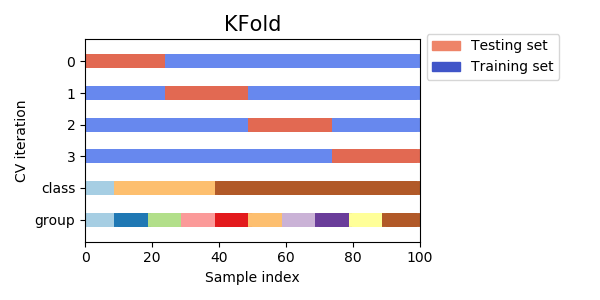

In [61]:
from sklearn.model_selection import KFold

# 划分示例
data1 = list(range(8))
kf = KFold(n_splits=4)
for train, test in kf.split(data1):
    print("%s %s" % (train, test))

[2 3 4 5 6 7] [0 1]
[0 1 4 5 6 7] [2 3]
[0 1 2 3 6 7] [4 5]
[0 1 2 3 4 5] [6 7]


In [62]:
# 建模示例
kf = KFold(n_splits=5)
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=4)
cross_val_score(gbc, X, y, cv=kf, n_jobs=-1)

MemoryError: Unable to allocate 10.7 MiB for an array with shape (26048, 108) and data type float32

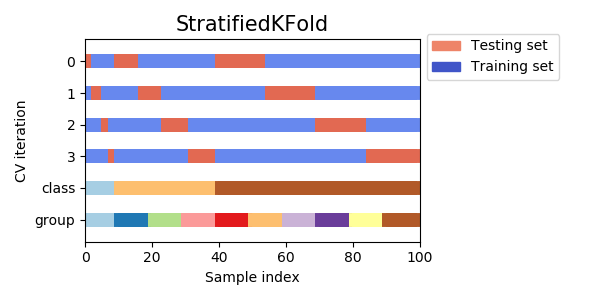

In [63]:
from sklearn.model_selection import StratifiedKFold

# 划分示例
data2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
labels = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

skf = StratifiedKFold(n_splits=4)
for train, test in skf.split(data2, labels):
    print("%s %s" % (train, test))

[ 1  2  3  6  7  8  9 10 11] [0 4 5]
[ 0  2  3  4  5  8  9 10 11] [1 6 7]
[ 0  1  3  4  5  6  7 10 11] [2 8 9]
[0 1 2 4 5 6 7 8 9] [ 3 10 11]


In [64]:
# 建模示例
skf = StratifiedKFold(n_splits=5)
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=4)
cross_val_score(gbc, X, y, cv=skf, n_jobs=-1)

array([0.85997236, 0.85949017, 0.86517199, 0.86578624, 0.86701474])

**ShuffleSplit则是在原始顺序的数据上，进行随机采样，拼成指定的test_size和train_size的数据供交叉验证  
示意图如下**  

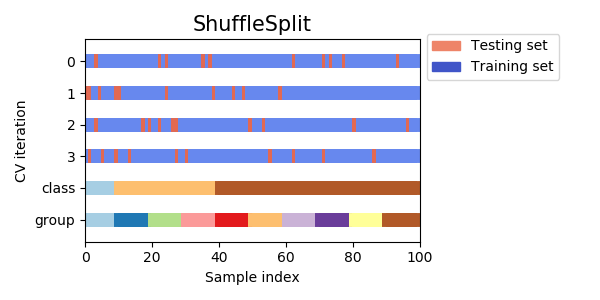  
  
ShuffleSplit将在每次迭代期间随机采样整个数据集，以生成训练集和测试集。在每次交叉验证的迭代中，test_size和train_size参数控制测试和训练集应该多大。由于是在每次迭代中从整个数据集中进行采样（即有放回的采样），因此**ShuffleSplit可能在另一次迭代中再次选择前一次迭代中选择过的样本**（注意，**KFold即使设置了shuffle参数为True也仍然在每一折的划分中不会有重叠的样本**，这是**两者之间最大的区别**）  
  
ShuffleSplit划分时跟图中的classes or groups(类别占比)无关

In [ ]:
from sklearn.model_selection import ShuffleSplit

# 划分示例
data1 = list(range(12))
ss = ShuffleSplit(n_splits=4, test_size=0.25, random_state=500)
for train, test in ss.split(data1):
    print("%s %s" % (train, test))

实际中，我们一般会使用StratifiedKFold（按样本各类别标签分层抽样）方式来做交叉验证划分样本，确保训练集、测试集中各类别样本的比例与原始数据集中一致。

当然类似于上面KFold与ShuffleSplit区别，StratifiedKFold和StratifiedShuffleSplit区别同样是在划分或抽样的方式上，只不过加上了分层的条件，所以StratifiedKFold是在每类样本中都进行K折，StratifiedShuffleSplit是在每类样本中都随机有放回地抽样指定比例的样本后得到的这部分数据作为验证集，其余作为训练集，因此每次划分都考虑到了各个类别间的分布占比，示意图如下

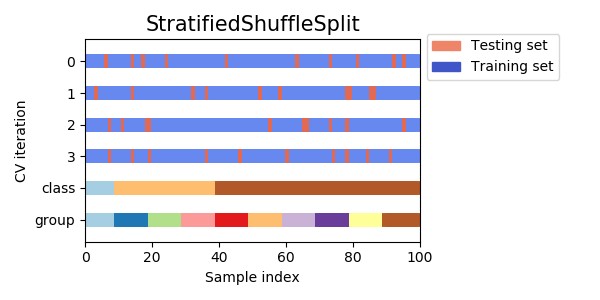

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# 划分示例
data2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
labels = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

sss = StratifiedShuffleSplit(n_splits=4, test_size=0.25)
for train, test in sss.split(data2, labels):
    print("%s %s" % (train, test))

```python
class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
```

参数：
* estimator——用什么模型
* param__grid——参数字典（key为要寻优的参数名，value为要尝试寻优的值的列表）
* scoring——用什么指标来评估（分类器默认用准确率，也可改为'f1'、'roc_auc'等）
* cv—— 几折交叉验证（默认5，一般设置5-10， 也可以传入一个KFold或Stratified迭代器，但实际上传入整数默认就是用Stratified迭代器）
* n_jobs——开n个进程并行计算，默认为1（建议设置-1，让之并行计算）
* verbose——是否要将学习过程打印出来（如0或1或2或3，数字越大，打印信息越详细。但有的模型没有学习的过程，如这个perceptrom）
* iid——假设样本是否是独立同分布的（默认是True）
* refit——是否需要直接返回在整个训练集上的最佳分类器，默认为True，可直接将这个GridSearchCV实例用于predict
* error_score——遇到不合理的参数是否要报错，默认'nan'

In [1]:
from sklearn.model_selection import GridSearchCV

clf = GradientBoostingClassifier()
param_grid ={"learning_rate":[0.001, 0.05],
             'n_estimators':[50, 100],
             'max_depth':[2, 4]}
gscv = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=1, cv=5, scoring='f1')

NameError: name 'GradientBoostingClassifier' is not defined

In [ ]:
gscv.fit(X,y)

In [ ]:
gscv.best_score_

In [ ]:
gscv.best_params_

## 模型评估（二）：评估指标

具体可以参考sklearn文档中列明的scoring指标：  
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter  
  
例如分类任务可用的scoring指标如下

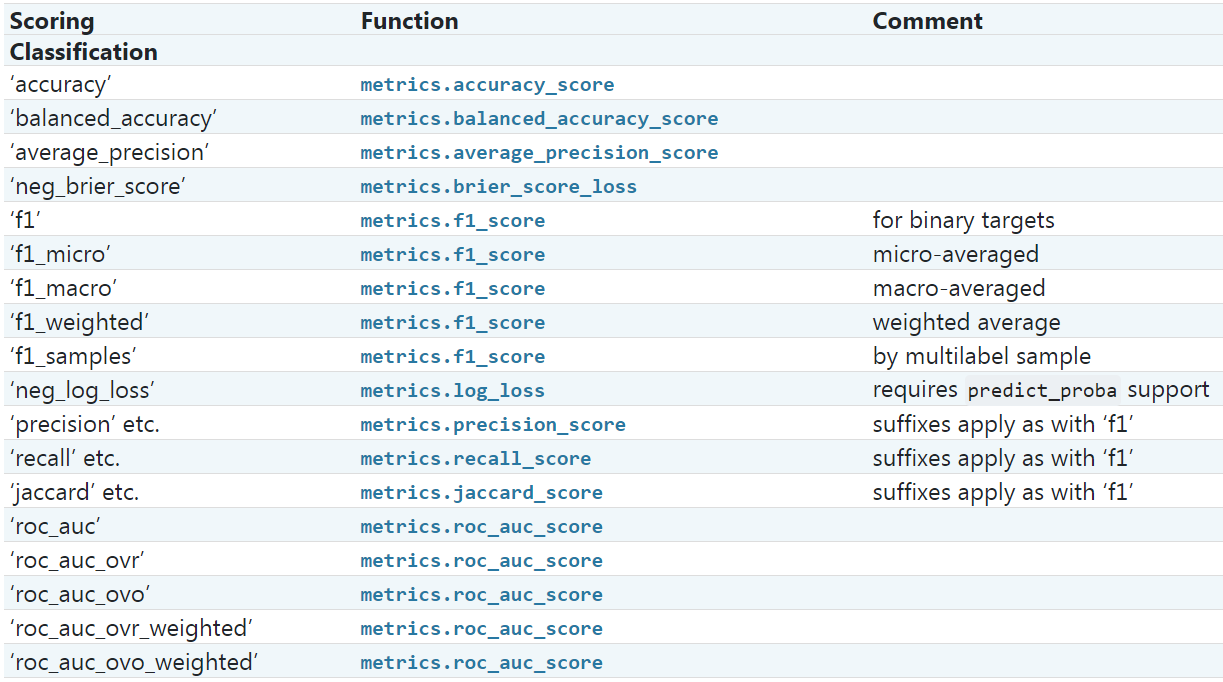

In [ ]:
clf = GradientBoostingClassifier()
param_grid ={"learning_rate":[0.001, 0.05],
             'n_estimators':[50, 100],
             'max_depth':[2, 4]}

gscv = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=4, cv=5, error_score=0, scoring='roc_auc')

In [ ]:
gscv.fit(X,y)

In [ ]:
gscv.best_score_

In [ ]:
gscv.best_params_